In [1]:
%matplotlib inline

from analysis import separate_logs, get_table, check_outputs
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
from math import factorial

In [2]:
logs = separate_logs('mnist_eqiv_branch_s=0_delta=0_pi=0.txt')
df = get_table(logs[-1])

In [3]:
df

,SolFound,Expl,Unexpl,Obj,Depth,IntInf,Incumbent,BestBd,Gap,It/Node,Time
0,0,0.0,0.0,163.74815,0.0,24.0,NaN,163.74815,NaN,NaN,0.0
1,0,0.0,0.0,144.47346,0.0,69.0,NaN,144.47346,NaN,NaN,0.0
2,0,0.0,0.0,142.30701,0.0,62.0,NaN,142.30701,NaN,NaN,0.0
3,0,0.0,0.0,141.86239,0.0,68.0,NaN,141.86239,NaN,NaN,0.0
4,0,0.0,0.0,138.05164,0.0,61.0,NaN,138.05164,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
141,0,190758.0,116431.0,0.43362,75.0,19.0,0.0,43.87822,NaN,63.6,580.0
142,0,192530.0,117539.0,23.94101,58.0,36.0,0.0,43.79486,NaN,63.5,585.0
143,0,194417.0,118786.0,0.20832,71.0,28.0,0.0,43.69557,NaN,63.5,590.0
144,0,196416.0,120152.0,36.66386,47.0,47.0,0.0,43.58483,NaN,63.5,595.0


In [4]:
df.drop_duplicates(subset='Time', keep='last', inplace=True)

In [5]:
df

,SolFound,Expl,Unexpl,Obj,Depth,IntInf,Incumbent,BestBd,Gap,It/Node,Time
24,0,0.0,0.0,124.91261,0.0,48.0,NaN,124.91261,NaN,NaN,0.0
30,0,0.0,2.0,124.91261,0.0,32.0,0.0,124.91261,NaN,NaN,1.0
31,0,745.0,623.0,39.14078,27.0,32.0,0.0,90.52475,NaN,80.1,5.0
32,0,1372.0,969.0,86.82928,20.0,64.0,0.0,89.27102,NaN,89.1,10.0
33,0,2957.0,1744.0,50.88216,30.0,52.0,0.0,87.45599,NaN,74.6,15.0
...,...,...,...,...,...,...,...,...,...,...,...
141,0,190758.0,116431.0,0.43362,75.0,19.0,0.0,43.87822,NaN,63.6,580.0
142,0,192530.0,117539.0,23.94101,58.0,36.0,0.0,43.79486,NaN,63.5,585.0
143,0,194417.0,118786.0,0.20832,71.0,28.0,0.0,43.69557,NaN,63.5,590.0
144,0,196416.0,120152.0,36.66386,47.0,47.0,0.0,43.58483,NaN,63.5,595.0


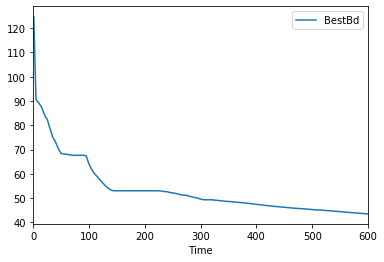

In [6]:
df.plot(x ='Time', y='BestBd', kind = 'line')
plt.show()

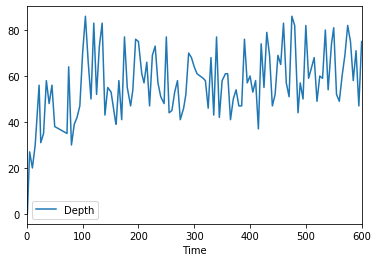

In [7]:
df.plot(x='Time', y='Depth', kind='line')
plt.show()

In [8]:
logs = separate_logs('mnist_eqiv_branch_s=0_delta=0_pi=1.txt')
df_pi = get_table(logs[-1])
df_pi.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_eqiv_branch_s=0_delta=1_pi=0.txt')
df_delta = get_table(logs[-1])
df_delta.drop_duplicates(subset='Time', keep='last', inplace=True)

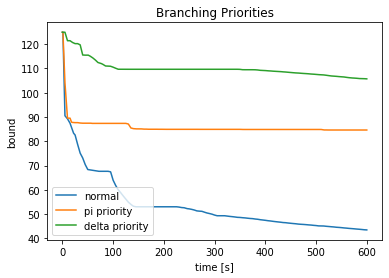

In [9]:
plt.plot('Time', 'BestBd', data=df, label='normal')
plt.plot('Time', 'BestBd', data=df_pi, label='pi priority')
plt.plot('Time', 'BestBd', data=df_delta, label='delta priority')

plt.xlabel('time [s]')
plt.ylabel('bound')

plt.title("Branching Priorities")

plt.legend()

plt.show()

plt.show()

In [10]:
logs = separate_logs('mnist_eqiv_one_hot_partial_top_3.txt')
df_partial = get_table(logs[-1])
df_partial.drop_duplicates(subset='Time', keep='last', inplace=True)

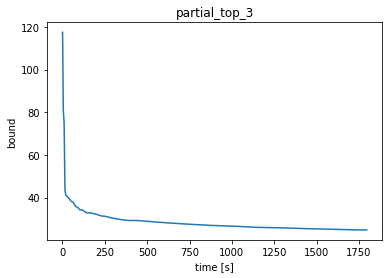

In [13]:
plt.plot('Time', 'BestBd', data=df_partial)

plt.xlabel('time [s]')
plt.ylabel('bound')

# plt.yscale('log')

plt.title("partial_top_3")

plt.show()

In [14]:
logs = separate_logs('mnist_eqiv_one_hot_partial_top_1.txt')
df_partial1 = get_table(logs[-1])
df_partial1.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_eqiv_ranking_top_1.txt')
df_ranking1 = get_table(logs[-1])
df_ranking1.drop_duplicates(subset='Time', keep='last', inplace=True)

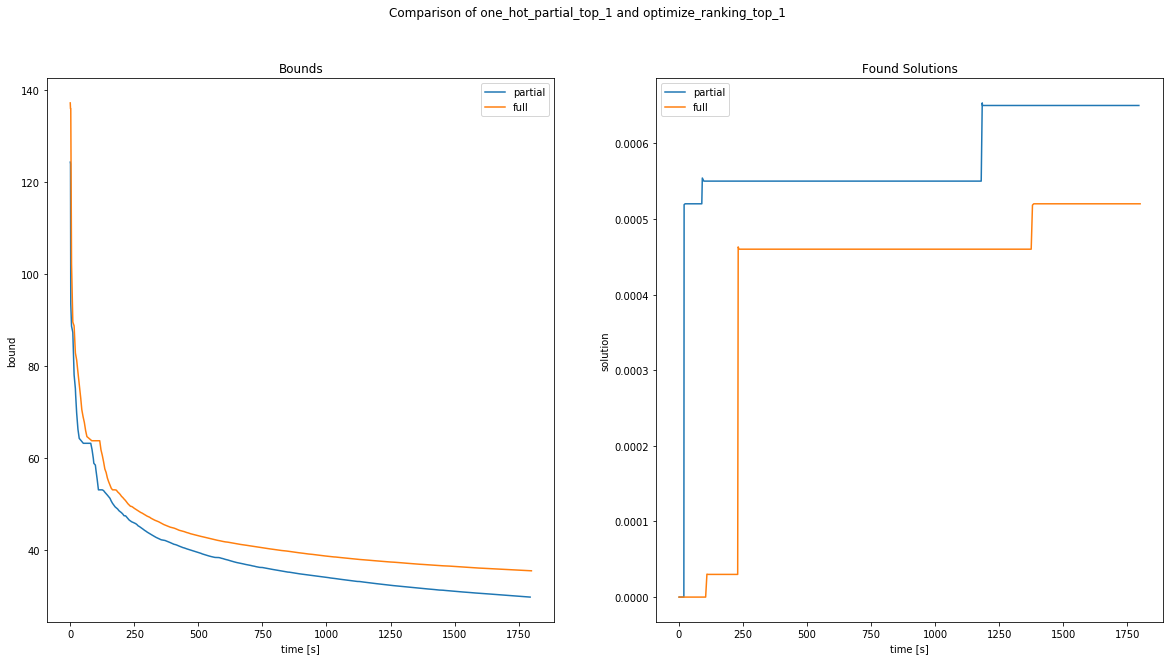

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison of one_hot_partial_top_1 and optimize_ranking_top_1')

ax1.plot('Time', 'BestBd', data=df_partial1, label='partial')
ax1.plot('Time', 'BestBd', data=df_ranking1, label='full')

ax1.set_xlabel('time [s]')
ax1.set_ylabel('bound')

ax1.title.set_text('Bounds')
ax1.legend()

ax2.plot('Time', 'Incumbent', data=df_partial1, label='partial')
ax2.plot('Time', 'Incumbent', data=df_ranking1, label='full')

ax2.title.set_text('Found Solutions')
ax2.legend()

ax2.set_xlabel('time [s]')
ax2.set_ylabel('solution')

plt.show()

In [ ]:
logs = separate_logs('OneHotPartialTop/mnist_eqiv_one_hot_partial_top_3.txt')
df_p0 = get_table(logs[-1])
df_p0.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_p40_eqiv_one_hot_partial_top_3.txt')
df_p40 = get_table(logs[-1])
df_p40.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_p30_eqiv_one_hot_partial_top_3.txt')
df_p30 = get_table(logs[-1])
df_p30.drop_duplicates(subset='Time', keep='last', inplace=True)

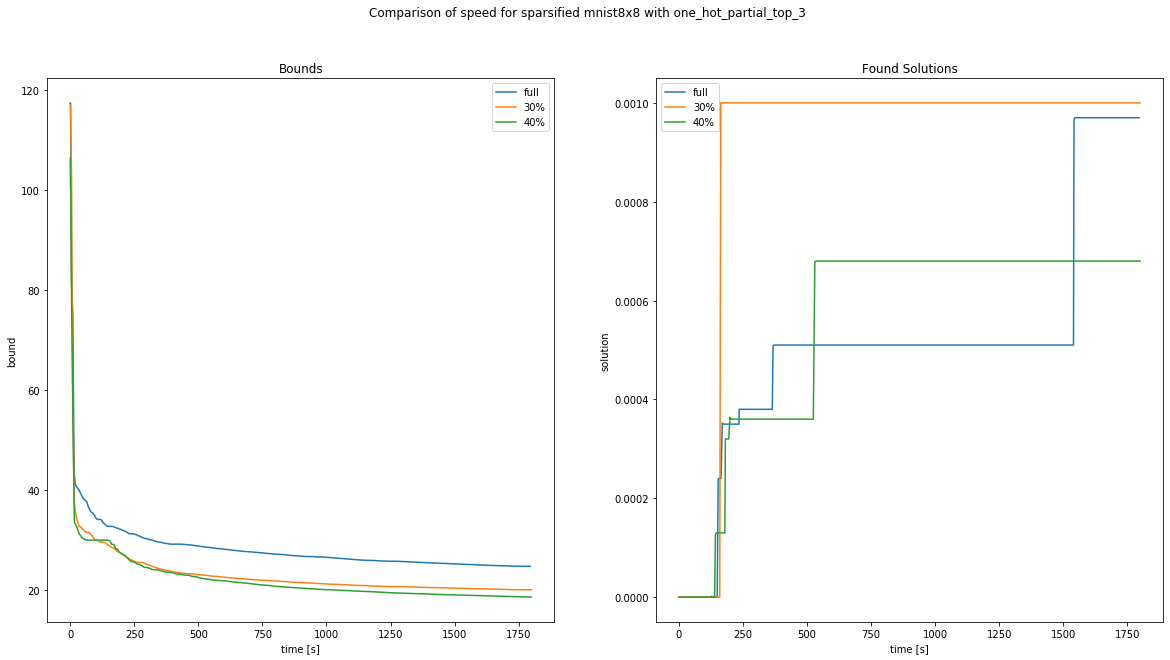

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison of speed for sparsified mnist8x8 with one_hot_partial_top_3')

ax1.plot('Time', 'BestBd', data=df_p0, label='full')
ax1.plot('Time', 'BestBd', data=df_p30, label='30%')
ax1.plot('Time', 'BestBd', data=df_p40, label='40%')

ax1.set_xlabel('time [s]')
ax1.set_ylabel('bound')

ax1.title.set_text('Bounds')
ax1.legend()

ax2.plot('Time', 'Incumbent', data=df_p0, label='full')
ax2.plot('Time', 'Incumbent', data=df_p30, label='30%')
ax2.plot('Time', 'Incumbent', data=df_p40, label='40%')

ax2.title.set_text('Found Solutions')
ax2.legend()

ax2.set_xlabel('time [s]')
ax2.set_ylabel('solution')

plt.show()

In [3]:
logs = separate_logs('mnist8x8_lin_context.txt')
df_context = get_table(logs[-1])
df_context.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist8x8_lin_no_context.txt')
df_nocontext = get_table(logs[-1])
df_nocontext.drop_duplicates(subset='Time', keep='last', inplace=True)

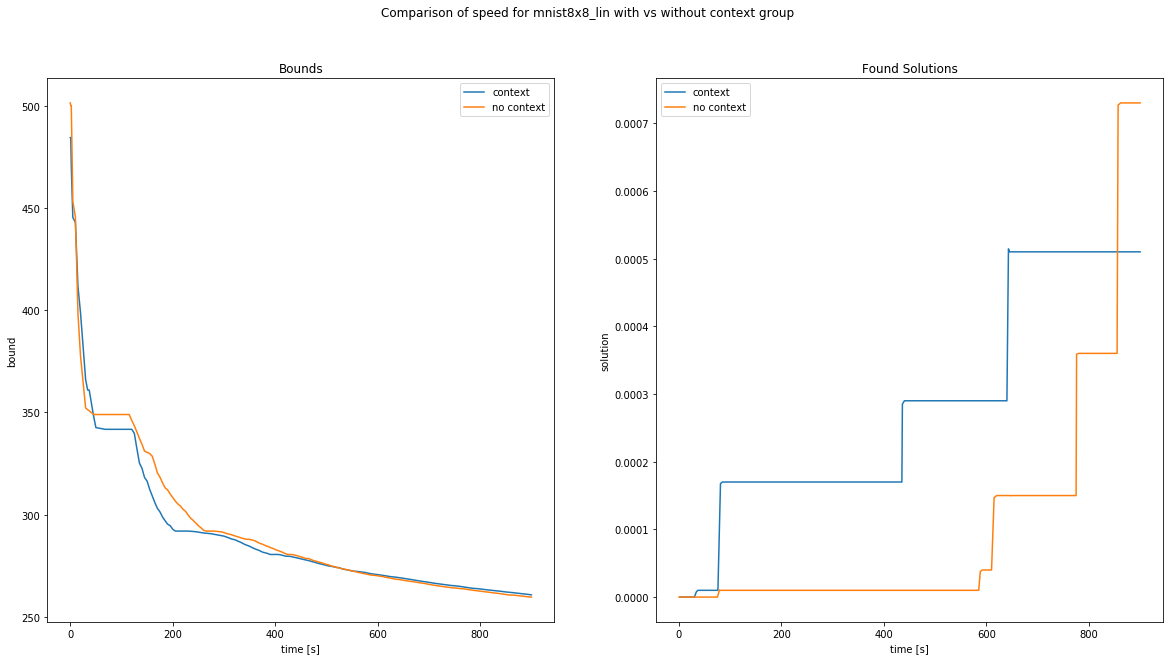

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison of speed for mnist8x8_lin with vs without context group')

ax1.plot('Time', 'BestBd', data=df_context, label='context')
ax1.plot('Time', 'BestBd', data=df_nocontext, label='no context')

ax1.set_xlabel('time [s]')
ax1.set_ylabel('bound')

ax1.title.set_text('Bounds')
ax1.legend()

ax2.plot('Time', 'Incumbent', data=df_context, label='context')
ax2.plot('Time', 'Incumbent', data=df_nocontext, label='no context')

ax2.title.set_text('Found Solutions')
ax2.legend()

ax2.set_xlabel('time [s]')
ax2.set_ylabel('solution')

plt.show()

In [5]:
logs = separate_logs('mnist8x8_lin_context_mip3.txt')
df_context_mip3 = get_table(logs[-1])
df_context_mip3.drop_duplicates(subset='Time', keep='last', inplace=True)

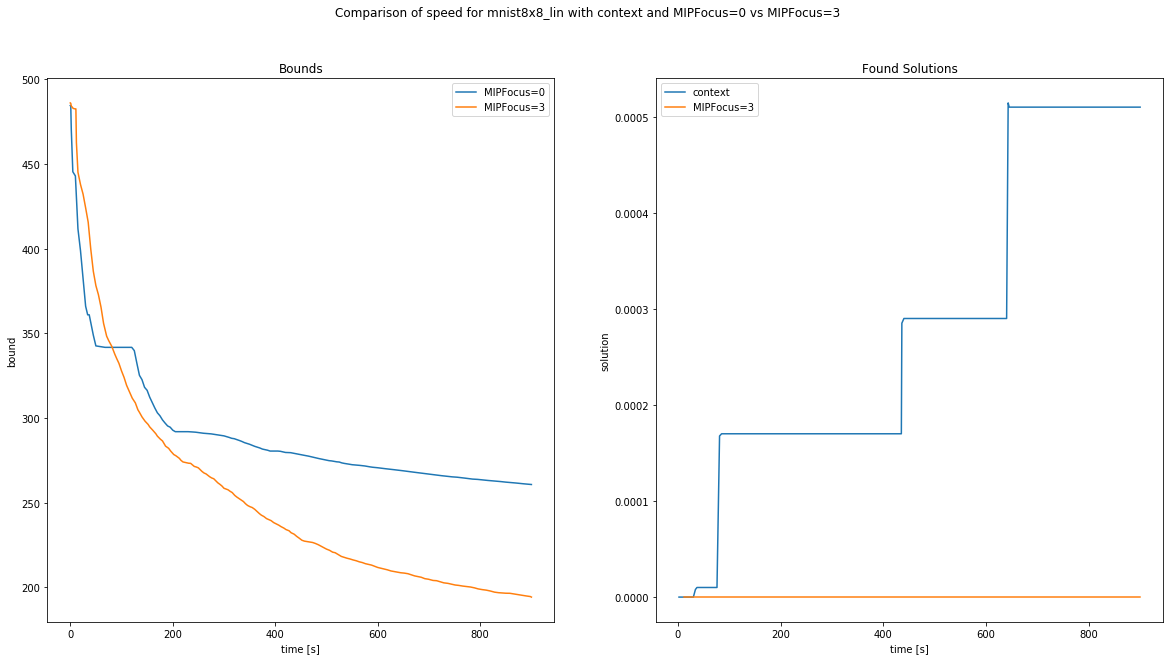

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison of speed for mnist8x8_lin with context and MIPFocus=0 vs MIPFocus=3')

ax1.plot('Time', 'BestBd', data=df_context, label='MIPFocus=0')
ax1.plot('Time', 'BestBd', data=df_context_mip3, label='MIPFocus=3')

ax1.set_xlabel('time [s]')
ax1.set_ylabel('bound')

ax1.title.set_text('Bounds')
ax1.legend()

ax2.plot('Time', 'Incumbent', data=df_context, label='context')
ax2.plot('Time', 'Incumbent', data=df_context_mip3, label='MIPFocus=3')

ax2.title.set_text('Found Solutions')
ax2.legend()

ax2.set_xlabel('time [s]')
ax2.set_ylabel('solution')

plt.show()

# Input Restriction centered around cluster #

Evaluation of equivalence within a chebyshev or manhattan norm sphere around the centroid of the 0-cluster, when clustering the training data using k-means with k=10.

In [14]:
def load_norm_inputs():
    named_ins = []
    avg_dist = 98.90813648293964
    dims = 64
    steps = [1/40, 1/20, 1/10, 1/5, 1/3, 1/2]
    
    for s in steps:
        r_m = s * avg_dist
        name_m = 'mnist_70_vs_80_{metric}_r_{radius}'.format(metric='manhattan', radius=r_m)
        
        with open (name_m + '.pickle', 'rb') as fp:
            named_ins.append((name_m, pickle.load(fp)))
        
        r_c = (s * avg_dist) / dims
        name_c = 'mnist_70_vs_80_{metric}_r_{radius}'.format(metric='chebyshev', radius=r_c)
        
        with open (name_c + '.pickle', 'rb') as fp:
            named_ins.append((name_c, pickle.load(fp)))
            
    return named_ins
    

C:\Users\Philipp\PycharmProjects\NNEquivalence\venv\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


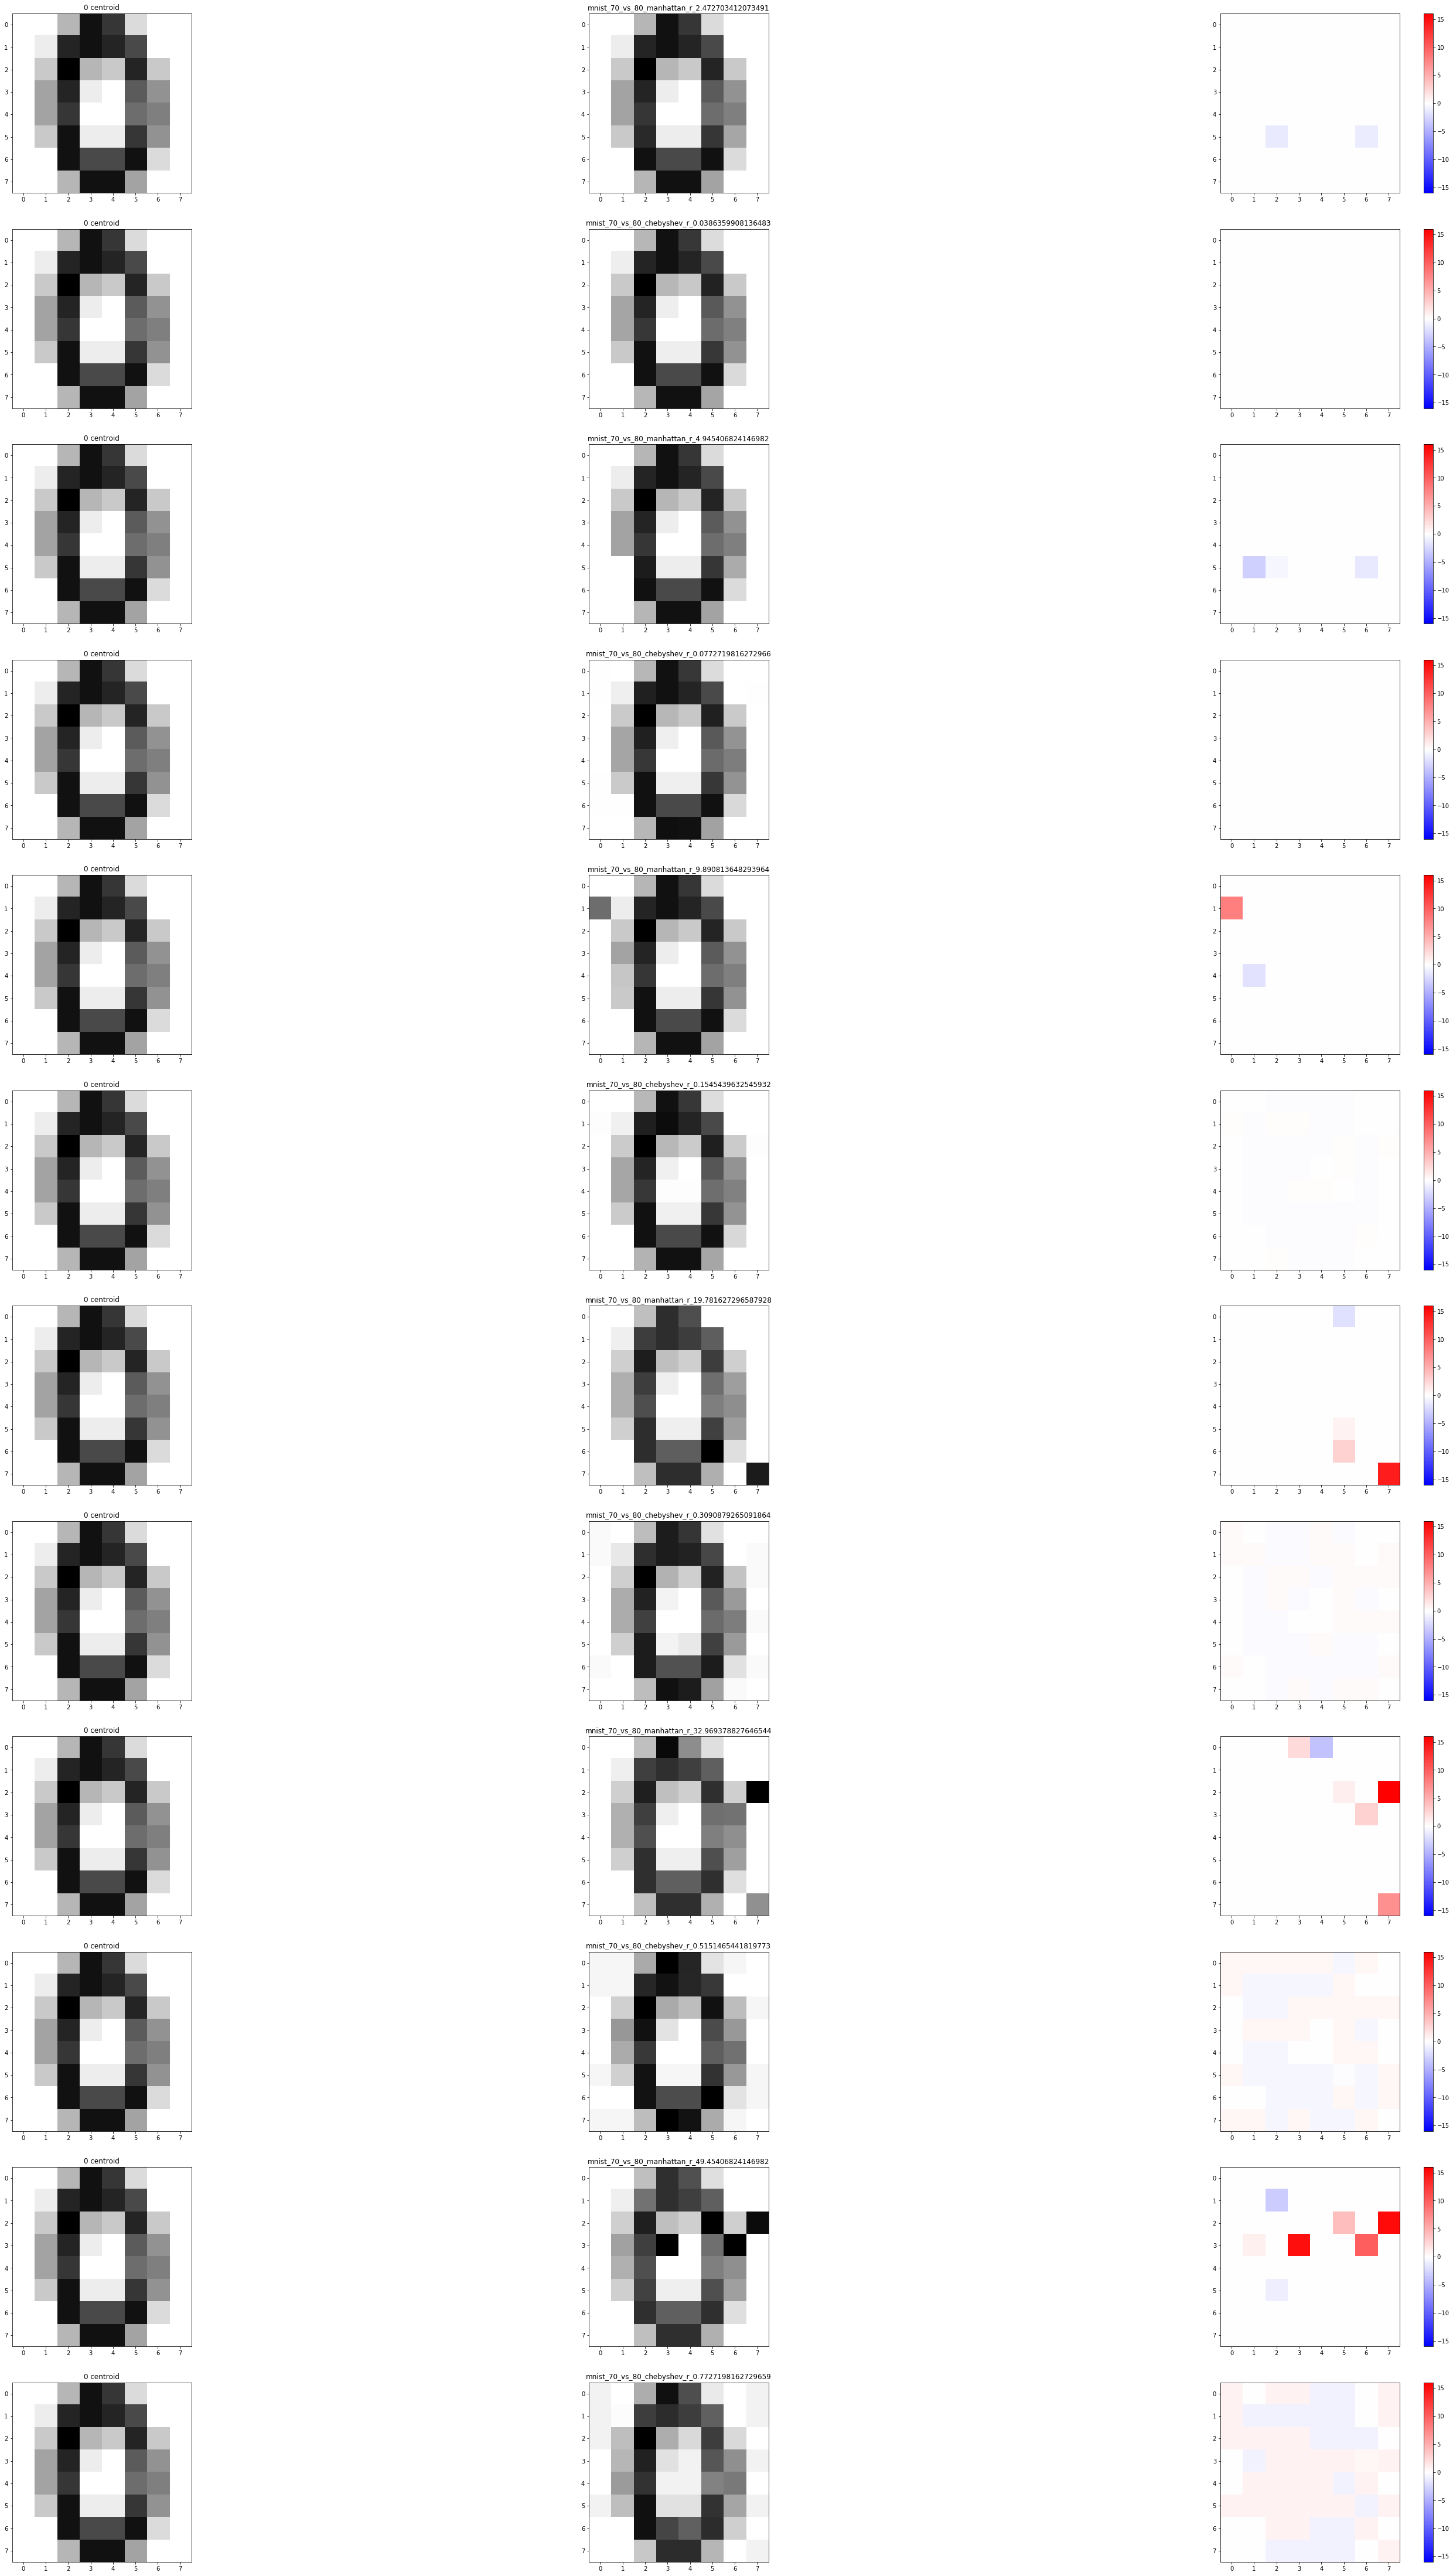

In [17]:
# centroid of the 0 cluster
center = np.array([[0, 0, 4, 13, 11, 2, 0, 0],
                    [0, 1, 12, 13, 12, 10, 0, 0],
                    [0, 3, 14, 4, 3, 12, 3, 0],
                    [0, 5, 12, 1, 0, 9, 6, 0],
                    [0, 5, 11, 0, 0, 8, 7, 0],
                    [0, 3, 13, 1, 1, 11, 6, 0],
                    [0, 0, 13, 10, 10, 13, 2, 0],
                    [0, 0, 4, 13, 13, 5, 0, 0]])

ins = load_norm_inputs()

fig, axs = plt.subplots(len(ins), 3, figsize=(50,80))

for i in range(len(ins)):
    name, inimg = ins[i]
    img = np.array(inimg).reshape(8,8)
    diff = np.subtract(img , center)
    
    axs[i, 0].imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    axs[i, 0].set_title('0 centroid')
    axs[i, 1].imshow(img, interpolation='nearest', cmap=plt.cm.binary)
    axs[i, 1].set_title(name)
    cb = axs[i, 2].imshow(diff, interpolation='nearest', cmap='bwr', vmin=-16, vmax=16)

    fig.colorbar(cb, ax=axs[i, 2])
    
fig.show()


## Input restriction centered around cluster ##

The same as in the above section, but i forgot to enable `fc.use_eps_maximum` so gurobi could choose, which output is the top output of the first NN, if their activations were the same.

Below is the correct version.

In [65]:
def load_norm_inputs_step():
    '''
    returns a 3-tuple of (name, input, radius)
    '''
    named_ins = []
    avg_dist = 98.90813648293964
    dims = 64
    steps = [1/40, 1/20, 1/10, 1/5, 1/3, 1/2]
    
    for s in steps:
        r_m = s * avg_dist
        name_m = 'mnist_70_vs_80_{metric}_0_step_{s}'.format(metric='manhattan', s=s)
        
        with open (name_m + '.pickle', 'rb') as fp:
            named_ins.append((name_m, pickle.load(fp), r_m))
        
        r_c = ((s * avg_dist)**dims / factorial(dims))**(1/dims)
        name_c = 'mnist_70_vs_80_{metric}_0_step_{s}'.format(metric='chebyshev', s=s)
        
        with open (name_c + '.pickle', 'rb') as fp:
            named_ins.append((name_c, pickle.load(fp), r_c))
            
    return named_ins

In [29]:
def create_outputs_label(ins):
    path70 = '../ExampleNNs/mnist8x8_70p_retrain.h5'
    path80 = '../ExampleNNs/mnist8x8_80p_retrain.h5'
    outs70 = check_outputs(path70, ins, sort=False, printing=False)
    outs80 = check_outputs(path80, ins, sort=False, printing=False)
    
    a_idx = np.argmax([a.lo for a in outs70])
    b_atop = outs80[a_idx]
    
    outs70 = sorted(outs70, key=lambda x: -x.lo)
    outs80 = sorted(outs80, key=lambda x: -x.lo)
    
    a_str = ['{name} : {val}'.format(name=str(a), val=a.lo) for a in outs70[:3]]
    b_str = ['{name} : {val}'.format(name=str(a), val=a.lo) for a in outs80[:3]]
    
    b_atop_str = '{name} : {val}'.format(name=str(b_atop), val=b_atop.lo)
    if b_atop_str not in b_str:
        b_str.append(b_atop_str)
        
    a_str = ', '.join(a_str)
    b_str = ', '.join(b_str)
    return 'mnist70: ' + a_str + '\n' + 'mnist80: ' + b_str   

In [67]:
# centroid of the 0 cluster
center = np.array([[0, 0, 4, 13, 11, 2, 0, 0],
                    [0, 1, 12, 13, 12, 10, 0, 0],
                    [0, 3, 14, 4, 3, 12, 3, 0],
                    [0, 5, 12, 1, 0, 9, 6, 0],
                    [0, 5, 11, 0, 0, 8, 7, 0],
                    [0, 3, 13, 1, 1, 11, 6, 0],
                    [0, 0, 13, 10, 10, 13, 2, 0],
                    [0, 0, 4, 13, 13, 5, 0, 0]])

ins = load_norm_inputs_step()

In [68]:
def create_norm_plot(ins):
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    
    name, inimg, radius = ins
    img = np.array(inimg).reshape(8,8)
    diff = np.subtract(img , center)
    
    chebyshev = np.amax(np.abs(diff))
    manhattan = np.sum(np.abs(diff))
    
    axs[0].imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    axs[0].set_title('0 centroid')
    
    axs[1].imshow(img, interpolation='nearest', cmap=plt.cm.binary)
    axs[1].set_title('solution_image')
       
    cb = axs[2].imshow(diff, interpolation='nearest', cmap='bwr', vmin=-16, vmax=16)
    axs[2].set_title('solution_image - center')
    axs[2].set_xlabel('L_1 = {}\nL_inf = {}'.format(manhattan, chebyshev))

    outputs_txt = create_outputs_label(inimg)
    fig.text(.5, .15, outputs_txt, ha='center')
    
    fig.suptitle(name + '\nradius <= {}'.format(radius), y=0.85)
    fig.colorbar(cb, ax=axs[2], shrink=0.4)
    fig.tight_layout()
    #fig.subplots_adjust(top=1.2)
    
    fig.show()

C:\Users\Philipp\PycharmProjects\NNEquivalence\venv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


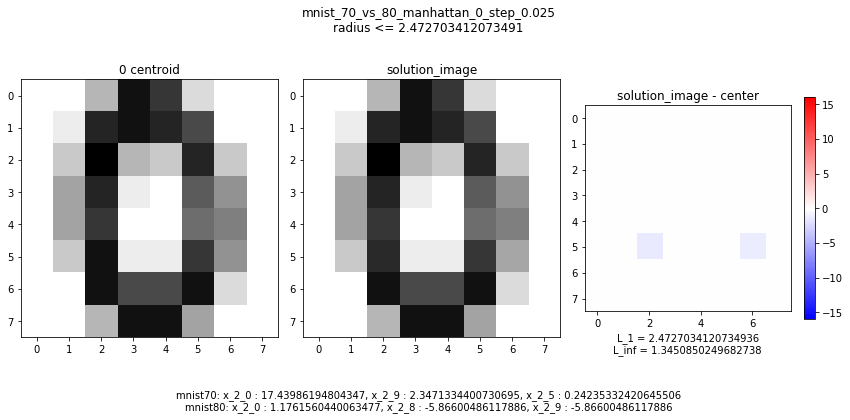

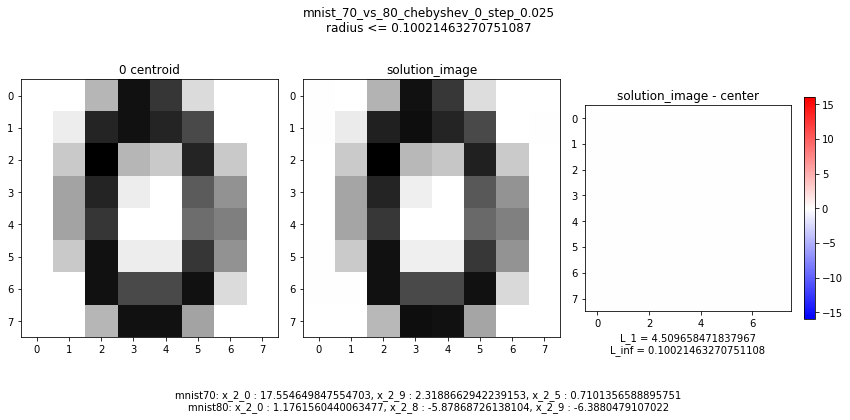

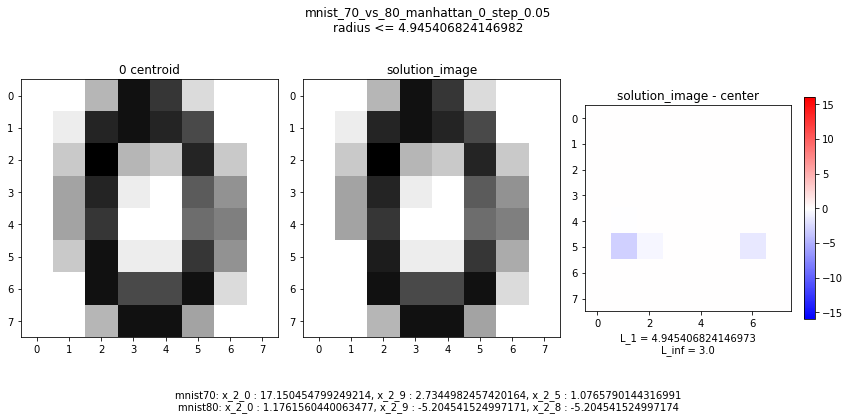

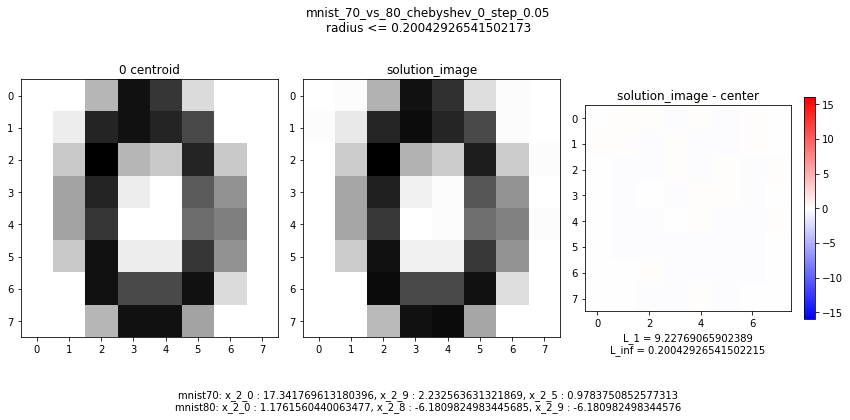

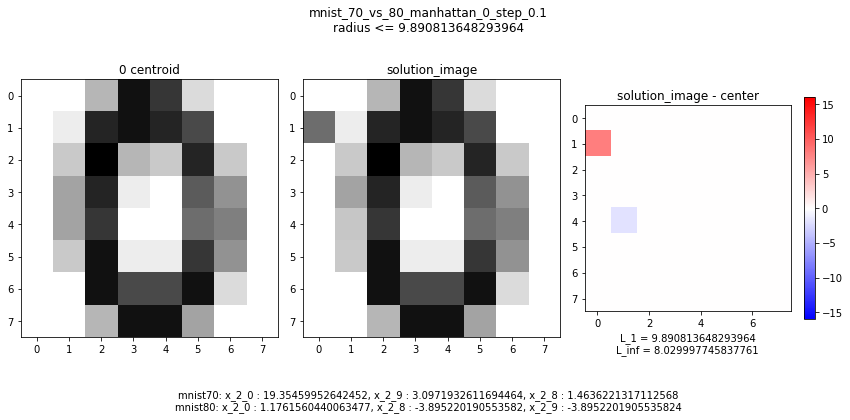

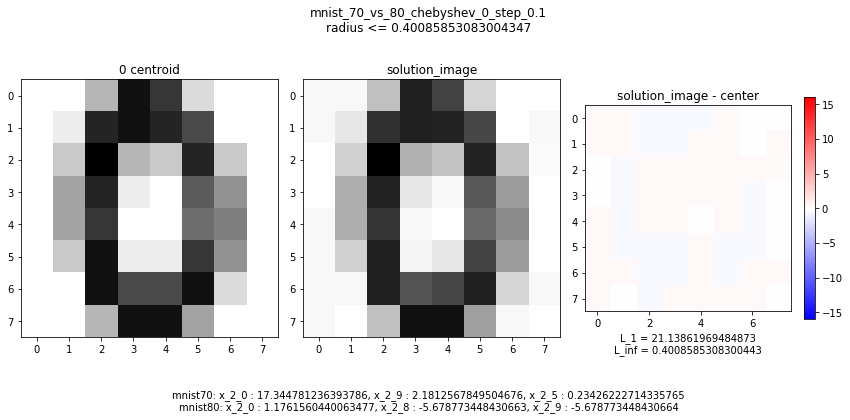

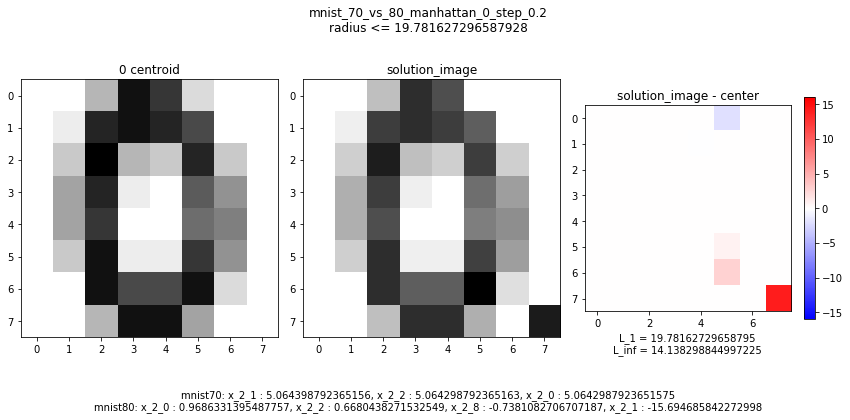

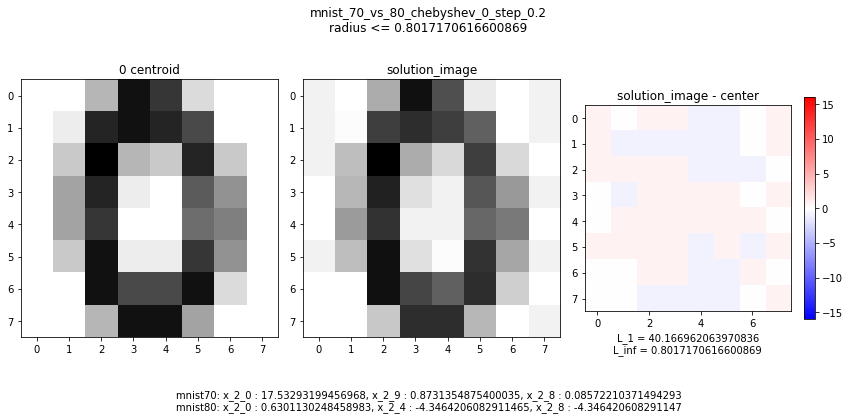

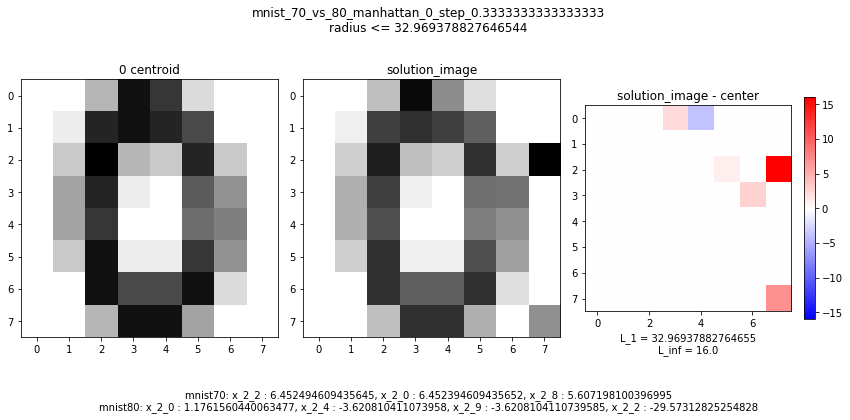

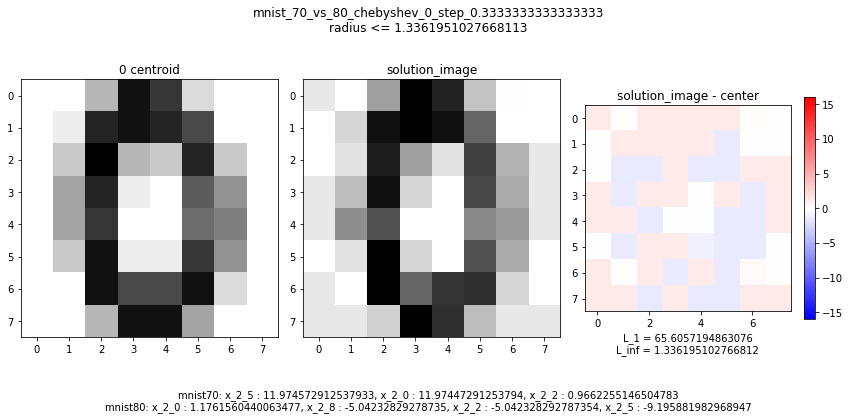

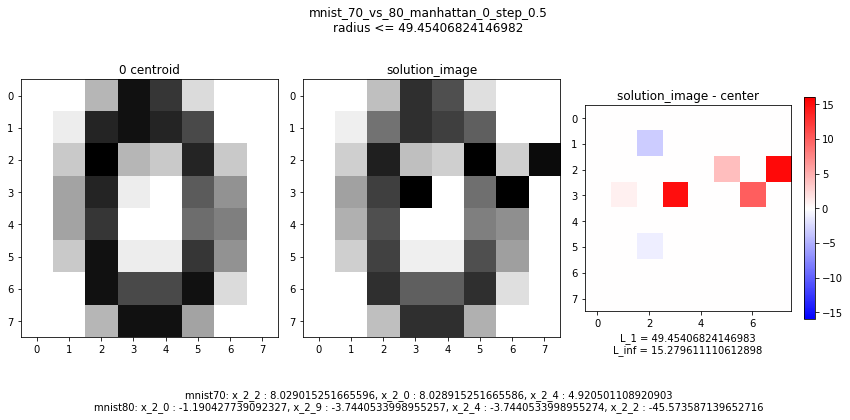

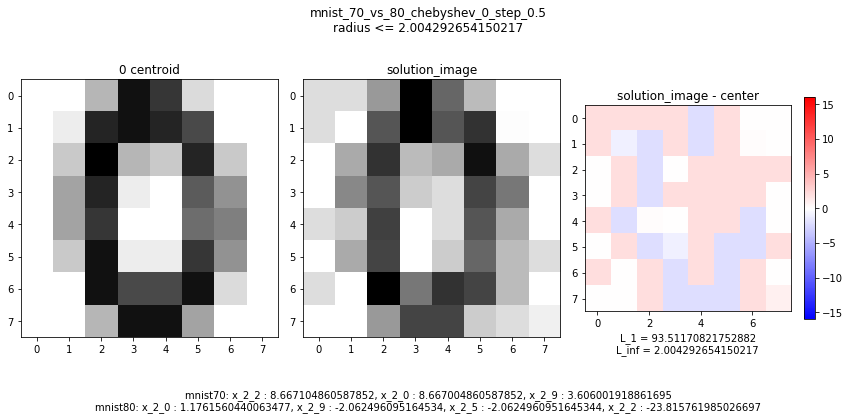

In [72]:
for i in range(len(ins)):
    create_norm_plot(ins[i])
    plt.savefig('norm_radius_{}.png'.format(i), bbox_inches='tight')

## Evaluation of Hierarchical Clustering ##

I tried to verify equivalence for `mnist8x8_70p_retrain` and `mnist8x8_80p_retrain` around the centers of the 10 most dense clusters, when the training data was hierarchically clustered using manhattan distance.

(Density was defined as `num_elements / avg_distance`, if `avg_distance > 0`)

For each of the 10 clusters, the verification was executed using radii of 1/20, 1/10 and 1/5 of the distance to the nearest other cluster center in manhattan distance.

In [22]:
def load_hierarchical_data():
    '''
    returns a 3-tuple of (name, input, radius)
    '''
    named_ins = []
    avg_dist = 98.90813648293964
    dims = 64
    steps = [1/20, 1/10, 1/5]
    
    # 10 most dense clusters in hierarchical manhattan clustering of mnist8x8 training data
    clusters_to_verify = pickle.load(open("Hierarchical_Clustering/to_verify.pickle", "rb"))
    
    for s in steps:
        for clno, cluster in enumerate(clusters_to_verify):
            r = s * cluster.distance

            name = 'mnist_70_vs_80_manhattan_cluster_{cl}_step_{s}'.format(cl=clno, s=s)
        
            with open ('Hierarchical_Clustering/' + name + '.pickle', 'rb') as fp:
                named_ins.append((name, pickle.load(fp), r))
            
    return named_ins, clusters_to_verify

In [27]:
def create_hierarchical_plot(ins, center):
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    
    name, inimg, radius = ins
    img = np.array(inimg).reshape(8,8)
    center = np.array(center).reshape(8,8)
    diff = np.subtract(img , center)
    
    chebyshev = np.amax(np.abs(diff))
    manhattan = np.sum(np.abs(diff))
    
    axs[0].imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    axs[0].set_title('cluster centroid')
    
    axs[1].imshow(img, interpolation='nearest', cmap=plt.cm.binary)
    axs[1].set_title('solution_image')
       
    cb = axs[2].imshow(diff, interpolation='nearest', cmap='bwr', vmin=-16, vmax=16)
    axs[2].set_title('solution_image - center')
    axs[2].set_xlabel('L_1 = {}\nL_inf = {}'.format(manhattan, chebyshev))

    outputs_txt = create_outputs_label(inimg)
    fig.text(.5, .15, outputs_txt, ha='center')
    
    fig.suptitle(name + '\nradius <= {}'.format(radius), y=0.85)
    fig.colorbar(cb, ax=axs[2], shrink=0.4)
    fig.tight_layout()
    #fig.subplots_adjust(top=1.2)
    
    fig.show()

In [16]:
def evaluate_outputs_diff(ins, path1='../ExampleNNs/mnist8x8_70p_retrain.h5', path2='../ExampleNNs/mnist8x8_80p_retrain.h5'):
    outs1 = check_outputs(path1, ins, sort=False, printing=False)
    outs2 = check_outputs(path2, ins, sort=False, printing=False)
    
    a_idx = np.argmax([a.lo for a in outs1])
    b_atop = outs2[a_idx]
    
    outs1 = sorted(outs1, key=lambda x: -x.lo)
    outs2 = sorted(outs2, key=lambda x: -x.lo)
    
    a_str = ['{name} : {val}'.format(name=str(a), val=a.lo) for a in outs1[:3]]
    b_str = ['{name} : {val}'.format(name=str(a), val=a.lo) for a in outs2[:3]]
    
    diff = outs2[2].lo - b_atop.lo
    
    b_atop_str = '{name} : {val}'.format(name=str(b_atop), val=b_atop.lo)
    if b_atop_str not in b_str:
        b_str.append(b_atop_str)
        
    a_str = ', '.join(a_str)
    b_str = ', '.join(b_str)
    return 'NN1: ' + a_str + '\n' + 'NN2: ' + b_str, diff

In [31]:
ins, clusters = load_hierarchical_data()

cluster_centers = [c.center for c in clusters]

ins_idx = [(named_in, idx) for idx, named_in in enumerate(ins)]

cnt = 0
for (name, inimg, radius), i in sorted(ins_idx, key=lambda x: x[0][0]):
    if cnt % 3 == 0:
        print('')
    print('{idx}: {n}: radius = {r}, diff = {d}'.format(idx=i, n=name, r=radius, d=evaluate_outputs_diff(inimg)[1]))
    cnt += 1


0: mnist_70_vs_80_manhattan_cluster_0_step_0.05: radius = 6.800000000000001, diff = -5.561660092735565
10: mnist_70_vs_80_manhattan_cluster_0_step_0.1: radius = 13.600000000000001, diff = -0.3037210138640938
20: mnist_70_vs_80_manhattan_cluster_0_step_0.2: radius = 27.200000000000003, diff = 11.08486523889734

1: mnist_70_vs_80_manhattan_cluster_1_step_0.05: radius = 4.3, diff = -11.053103817060231
11: mnist_70_vs_80_manhattan_cluster_1_step_0.1: radius = 8.6, diff = -6.392341777144814
21: mnist_70_vs_80_manhattan_cluster_1_step_0.2: radius = 17.2, diff = 0.0

2: mnist_70_vs_80_manhattan_cluster_2_step_0.05: radius = 3.85, diff = -7.739506044157915
12: mnist_70_vs_80_manhattan_cluster_2_step_0.1: radius = 7.7, diff = -6.771417435527831
22: mnist_70_vs_80_manhattan_cluster_2_step_0.2: radius = 15.4, diff = -3.6409108825108056

3: mnist_70_vs_80_manhattan_cluster_3_step_0.05: radius = 7.25, diff = -5.900980170427214
13: mnist_70_vs_80_manhattan_cluster_3_step_0.1: radius = 14.5, diff = 

call `create_hierarchical_plot(ins[i], cluster_centers[j])` with

- `i` the index displayed to the left in the list above (the index in the unsorted ins list)
- `j` the cluster index, visible in the name of the experiment

C:\Users\Philipp\PycharmProjects\NNEquivalence\venv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


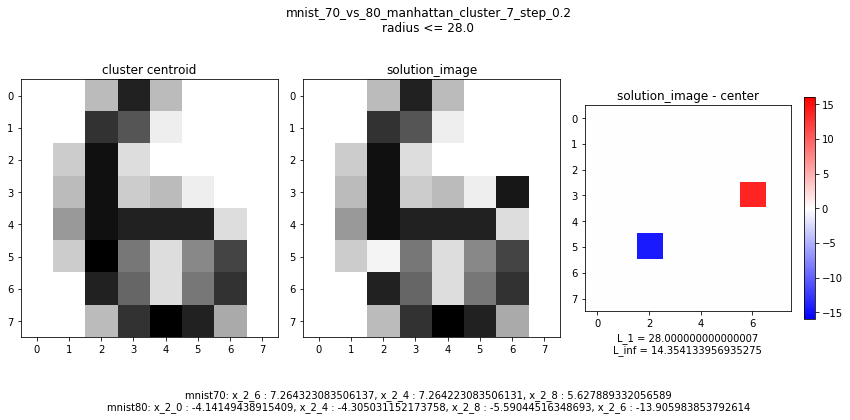

In [44]:
create_hierarchical_plot(ins[27], cluster_centers[7])

## Evaluation of Student-Teacher trained NN ##

The student-NN was not trained on the one-hot encoded labels of the training data, but instead on the hot-temperature softmax outputs of the teacher NN (here the 50% sparsified and retrained mnist8x8 NN)

The student-NN `mnist8x8_50p_student` consists of the following layers:

- Input Layer: 64 inputs
- ReLU: 24
- ReLU: 12
- Output Layer: 10 outputs

In [39]:
logs = separate_logs('mnist8x8_lin_context_mip3.txt')
df_context_mip3 = get_table(logs[-1])
df_context_mip3.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist8x8_50p_student_equiv.txt')
df_student = get_table(logs[-1])
df_student.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_80p_retrain_equiv_weekend.txt')
df_80p = get_table(logs[-1])
df_80p.drop_duplicates(subset='Time', keep='last', inplace=True)

logs = separate_logs('mnist_70p_retrain_equiv.txt')
df_70p = get_table(logs[-1])
df_70p.drop_duplicates(subset='Time', keep='last', inplace=True)

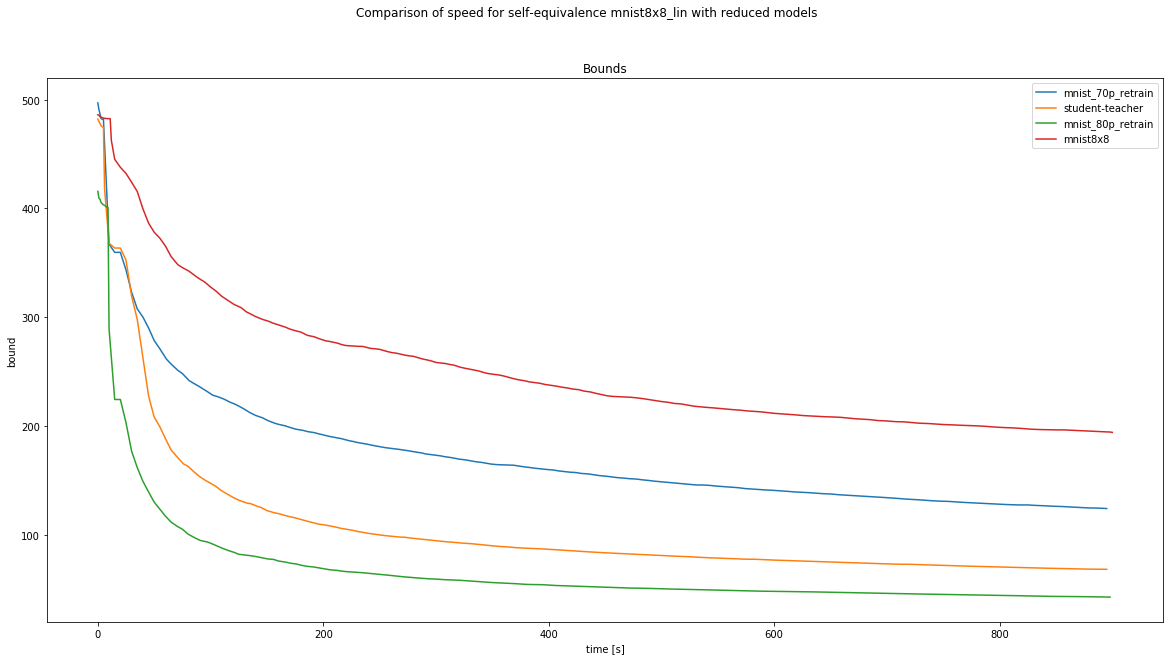

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
fig.suptitle('Comparison of speed for self-equivalence mnist8x8_lin with reduced models')

ax.plot('Time', 'BestBd', data=df_70p.loc[df_70p['Time'] <= 900], label='mnist_70p_retrain')
ax.plot('Time', 'BestBd', data=df_student.loc[df_student['Time'] <= 900], label='student-teacher')
ax.plot('Time', 'BestBd', data=df_80p.loc[df_80p['Time'] <= 900], label='mnist_80p_retrain')
ax.plot('Time', 'BestBd', data=df_context_mip3, label='mnist8x8')

ax.set_xlabel('time [s]')
ax.set_ylabel('bound')

ax.title.set_text('Bounds')
ax.legend()

plt.show()